In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Problem 2.24** (b), (c)

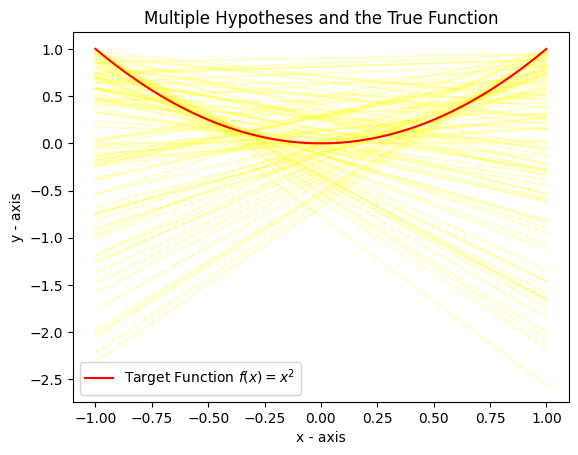

Average Variance: 0.4354711892179102
Average Bias: 1.066122932417552
Average Out-of-Sample Error (Eout): 9.089236974509512e-32
Sum of Bias and Variance: 1.5015941216354622


In [ ]:
# Setting constants for the experiment
num_trials = 100
sum_bias = sum_var = sum_Eout = 0

# Define the function for the true model f(x)
def true_function(x):
    return x**2

# Perform multiple experiments
for _ in range(num_trials):
    # Draw two random x points and compute corresponding y
    x_rand = np.random.uniform(-1, 1, 2)
    y_true = true_function(x_rand)

    # Get the linear coefficients for these points
    slope, intercept = np.polyfit(x_rand, y_true, deg=1)

    # Generate values for plotting the hypothesis
    x_continuous = np.linspace(-1, 1, 100)
    y_hypothesis = slope * x_continuous + intercept
    plt.plot(x_continuous, y_hypothesis, color='yellow', alpha=0.2)

    # Compute bias for the current hypothesis
    y_theoretical = true_function(x_continuous)
    current_bias = np.mean((y_theoretical - y_hypothesis)**2)
    sum_bias += current_bias

    # Compute Eout for the current hypothesis using the original 2 points
    y_hypothesis_at_rand = slope * x_rand + intercept
    current_Eout = np.mean((y_true - y_hypothesis_at_rand)**2)
    sum_Eout += current_Eout

    # Compute the variance for the current hypothesis
    noise = np.random.normal(0, 0.01, size=(1000, len(x_continuous)))
    y_samples = slope * x_continuous + intercept + noise
    current_variance = np.var(np.mean(y_samples, axis=0))
    sum_var += current_variance

    # Accumulate the results
    sum_bias += current_bias
    sum_var += current_variance
    sum_Eout += current_Eout

# Calculate the averages
avg_bias = sum_bias / num_trials
avg_var = sum_var / num_trials
avg_Eout = sum_Eout / num_trials

# Plot the true function
plt.plot(x_continuous, y_theoretical, label='Target Function $f(x) = x^2$', color='red')

# Final plot adjustments
plt.title('Multiple Hypotheses and the True Function')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend()
plt.show()

# Output the results
print(f"Average Variance: {avg_var}")
print(f"Average Bias: {avg_bias}")
print(f"Average Out-of-Sample Error (Eout): {avg_Eout}")
print(f"Sum of Bias and Variance: {avg_bias + avg_var}")

**Q4.**

In [ ]:
def load_dataset(filename='ZipDigits.train'):

    with open(filename) as dataset_file:
        features_list = []
        labels_list = []
        dataset_lines = dataset_file.readlines()
        for data_line in dataset_lines:
            elements = data_line.strip().split(' ')
            label = int(float(elements[0]))
            labels_list.append(label)
            feature_values = [float(value) for value in elements[1:]]
            features_list.append(feature_values)
        features = np.array(features_list)
        targets = np.array(labels_list)
        targets = targets.reshape((targets.shape[0], 1))
        print(f'Features shape: {features.shape}')
        print(f'Targets shape: {targets.shape}')
        return features, targets

In [ ]:
# Load the training and testing datasets
trainFeatures, trainLabels = load_dataset('ZipDigits.train')
print(trainFeatures)
print(trainLabels)
# Determine the number of training examples and the number of pixels per example
numTrainExamples, numPixels = trainFeatures.shape

# Ensure the number of examples matches the number of labels in the training dataset
assert(numTrainExamples == trainLabels.shape[0])

# Load the test dataset
testFeatures, testLabels = load_dataset('ZipDigits.test')

# Determine the number of test examples and the number of pixels per example
numTestExamples, _ = testFeatures.shape

# Ensure the number of examples matches the number of labels in the test dataset
assert(numTestExamples == testLabels.shape[0])

Features shape: (7291, 256)
Targets shape: (7291, 1)
[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]
[[6]
 [5]
 [4]
 ...
 [3]
 [0]
 [1]]
Features shape: (2007, 256)
Targets shape: (2007, 1)


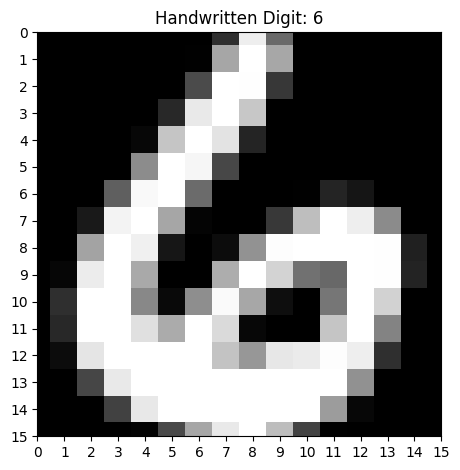

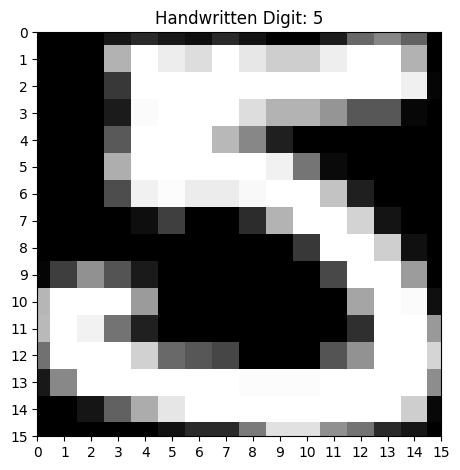

In [ ]:
def displayDigitImage(dataMatrix, labelVector, index):
    digitImage = dataMatrix[index, :].reshape((16, 16))
    plt.imshow(digitImage, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'Handwritten Digit: {labelVector[index, 0]}')
    plt.axis([0, 15, 15, 0])  # Set axis limits
    plt.xticks(range(16))  # Set x-ticks
    plt.yticks(range(16))  # Set y-ticks
    plt.tight_layout()
    plt.show()

# Display images of the first two handwritten digits
displayDigitImage(trainFeatures, trainLabels, 0)
displayDigitImage(trainFeatures, trainLabels, 1)

In [ ]:
def calculateAverageIntensity(pixelData):

    print('Calculating average intensity feature')
    numSamples, numPixels = pixelData.shape
    print(f'Input dimensions {numSamples}, {numPixels}')

    # Compute the average intensity for each image
    avgIntensities = np.mean(pixelData, axis=1, keepdims=True)

    print(f'Output dimensions {avgIntensities.shape}')
    return avgIntensities

def calculateImageSymmetry(pixelData):

    print('Calculating symmetry feature')
    numSamples, numPixels = pixelData.shape
    print(f'Input dimensions {numSamples}, {numPixels}')
    reshapedImages = [pixelData[i, :].reshape((16, 16)) for i in range(numSamples)]
    flippedImages = [np.flip(reshapedImages[i], axis=1) for i in range(numSamples)]

    reshapedImages = np.array(reshapedImages)
    flippedImages = np.array(flippedImages)

    # Compute symmetry by mean squared error between image and its horizontal flip
    mseDifferences = np.mean(np.square(reshapedImages - flippedImages), axis=(1, 2))
    imageSymmetries = 1 / (1 + mseDifferences)

    imageSymmetries = imageSymmetries.reshape(numSamples, 1)
    print(f'Output dimensions {imageSymmetries.shape}')
    return imageSymmetries

def createAugmentedFeatureMatrix(pixelData):

    numSamples, _ = pixelData.shape
    avgIntensity = calculateAverageIntensity(pixelData)
    imgSymmetry = calculateImageSymmetry(pixelData)
    biasColumn = np.ones((numSamples, 1))
    augmentedFeatures = np.concatenate((biasColumn, avgIntensity, imgSymmetry), axis=1)
    print(augmentedFeatures)
    print(f'Dimensions of augmented feature matrix: {augmentedFeatures.shape}')
    return augmentedFeatures

In [ ]:
print('Creating augmented feature matrix for training data')

augmentedTrainFeatures = createAugmentedFeatureMatrix(trainFeatures)
numAugmentedTrain, featureDimension = augmentedTrainFeatures.shape

print('Creating augmented feature matrix for testing data')

augmentedTestFeatures = createAugmentedFeatureMatrix(testFeatures)
numAugmentedTest, featureDimension = augmentedTestFeatures.shape

Creating augmented feature matrix for training data
Calculating average intensity feature
Input dimensions 7291, 256
Output dimensions (7291, 1)
Calculating symmetry feature
Input dimensions 7291, 256
Output dimensions (7291, 1)
[[ 1.         -0.31781641  0.66843001]
 [ 1.         -0.11173828  0.59007206]
 [ 1.         -0.53799609  0.61461237]
 ...
 [ 1.         -0.21258984  0.60619518]
 [ 1.          0.19517969  0.8268962 ]
 [ 1.         -0.44755859  0.88223511]]
Dimensions of augmented feature matrix: (7291, 3)
Creating augmented feature matrix for testing data
Calculating average intensity feature
Input dimensions 2007, 256
Output dimensions (2007, 1)
Calculating symmetry feature
Input dimensions 2007, 256
Output dimensions (2007, 1)
[[ 1.         -0.45564453  0.56440645]
 [ 1.         -0.46973437  0.5671716 ]
 [ 1.         -0.32814844  0.57892489]
 ...
 [ 1.         -0.38228516  0.48940933]
 [ 1.          0.01994141  0.71588486]
 [ 1.         -0.62204687  0.86770629]]
Dimensions of

In [ ]:
def mapDigitsToIndices(labels):

    totalEntries = labels.shape[0]
    indexMap = {}
    for index in range(totalEntries):
        currentLabel = labels[index, 0]
        if currentLabel not in indexMap:
            indexMap[currentLabel] = []
        indexMap[currentLabel].append(index)
    return indexMap

In [ ]:
# Function to index digits is assumed to be named mapDigitsToIndices based on previous response

trainDigitIndices = mapDigitsToIndices(trainLabels)
onesTrainFeatures = augmentedTrainFeatures[trainDigitIndices[1], :]
print(augmentedTrainFeatures[trainDigitIndices[1],:])
print(trainDigitIndices[1])
countOnesTrain = onesTrainFeatures.shape[0]
print(f'Number of 1s: {countOnesTrain}')
fivesTrainFeatures = augmentedTrainFeatures[trainDigitIndices[5], :]
print(trainDigitIndices[5])
countFivesTrain = fivesTrainFeatures.shape[0]
print(f'Number of 5s: {countFivesTrain}')
featuresTrain = augmentedTrainFeatures[trainDigitIndices[1]+trainDigitIndices[5], :]
labelsTrain = np.concatenate((np.ones((countOnesTrain, 1)), -1 * np.ones((countFivesTrain, 1))), axis=0)
totalTrain, featureDims = featuresTrain.shape
print(f'Total number of 1s and 5s: {totalTrain}')
print(f'FeaturesTrain shape: {featuresTrain.shape}, LabelsTrain shape: {labelsTrain.shape}')

testDigitIndices = mapDigitsToIndices(testLabels)
onesTestFeatures = augmentedTestFeatures[testDigitIndices[1], :]
print(augmentedTestFeatures[testDigitIndices[1],:])
print(testDigitIndices[1])
countOnesTest = onesTestFeatures.shape[0]
print(f'Number of 1s: {countOnesTest}')
fivesTestFeatures = augmentedTestFeatures[testDigitIndices[5], :]
print(testDigitIndices[5])
countFivesTest = fivesTestFeatures.shape[0]
print(f'Number of 5s: {countFivesTest}')
featuresTest = augmentedTestFeatures[testDigitIndices[1]+testDigitIndices[5], :]
labelsTest = np.concatenate((np.ones((len(testDigitIndices[1]), 1)), -1 * np.ones((len(testDigitIndices[5]), 1))), axis=0)
totalTest, featureDimsTest = featuresTest.shape
print(f'Total number of 1s and 5s: {totalTest}')
print(f'FeaturesTest shape: {featuresTest.shape}, LabelsTest shape: {labelsTest.shape}')

[[ 1.         -0.75391406  0.93355109]
 [ 1.         -0.77228125  0.86450322]
 [ 1.         -0.76925781  0.97489716]
 ...
 [ 1.         -0.60979297  0.77710542]
 [ 1.         -0.66230859  0.91543961]
 [ 1.         -0.44755859  0.88223511]]
[7, 9, 12, 13, 19, 29, 34, 44, 70, 82, 92, 112, 124, 126, 129, 137, 144, 175, 179, 184, 197, 206, 221, 233, 234, 236, 245, 246, 250, 251, 253, 256, 258, 259, 273, 281, 284, 289, 309, 311, 313, 319, 344, 353, 356, 364, 380, 385, 393, 395, 417, 428, 431, 446, 456, 459, 466, 469, 475, 484, 487, 503, 506, 508, 510, 518, 526, 529, 537, 547, 557, 572, 596, 599, 620, 621, 628, 632, 633, 642, 674, 698, 699, 700, 701, 703, 707, 714, 719, 727, 728, 738, 739, 753, 756, 762, 766, 771, 775, 780, 786, 790, 795, 798, 800, 808, 810, 815, 859, 895, 911, 917, 932, 937, 941, 954, 959, 968, 974, 988, 1052, 1074, 1075, 1085, 1092, 1093, 1097, 1100, 1101, 1106, 1109, 1111, 1113, 1114, 1117, 1119, 1135, 1140, 1151, 1182, 1184, 1192, 1200, 1202, 1205, 1207, 1210, 1214, 1219

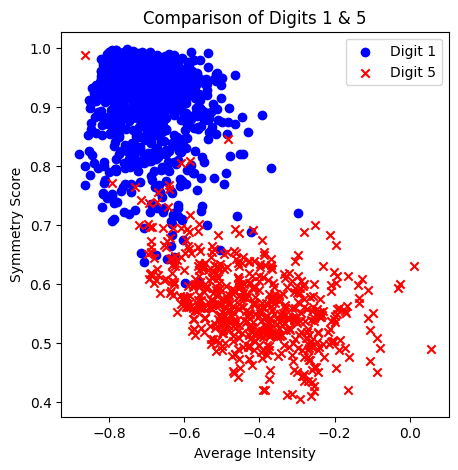

In [ ]:
# Create a plot to visualize the training data for digits 1 and 5
figure, axis = plt.subplots(figsize=(5, 5))
# Scatter plot for digit 1 with specific markers and color
axis.scatter(onesTrainFeatures[:, 1], onesTrainFeatures[:, 2], marker='o', color='blue', label='Digit 1')
# Scatter plot for digit 5 with different markers and color
axis.scatter(fivesTrainFeatures[:, 1], fivesTrainFeatures[:, 2], marker='x', color='red', label='Digit 5')
# Setting the labels for x and y axis
axis.set_xlabel('Average Intensity')
axis.set_ylabel('Symmetry Score')
axis.set_title('Comparison of Digits 1 & 5')
axis.legend()
plt.show()

**Q5.**

In [ ]:
def computeError(weight, feature, label, riskMatrix=None):

    predictedLabel = np.sign(np.dot(weight.T, feature))
    # Check if a custom risk matrix is provided and applicable
    if riskMatrix is not None and (label, predictedLabel) in riskMatrix:
        return riskMatrix[(label, predictedLabel)]
    # Default error calculation
    return 1 if label != predictedLabel else 0

def totalError(weight, features, labels, riskMatrix=None):

    datasetError = np.zeros((features.shape[0], 1))

    for index in range(features.shape[0]):
        datasetError[index] = computeError(weight, features[index], labels[index], riskMatrix)

    return datasetError

In [ ]:
def visualizeLinearBoundary(modelWeights, dataPoints, dataLabels, plotTitle=''):

    positiveIndices = np.where(dataLabels == 1)[0]
    negativeIndices = np.where(dataLabels == -1)[0]
    positives = dataPoints[positiveIndices, :]
    negatives = dataPoints[negativeIndices, :]

    figure, axis = plt.subplots(figsize=(5,5))
    axis.scatter(positives[:, 1], positives[:, 2], marker='o', color='blue', label='+1 Class')
    axis.scatter(negatives[:, 1], negatives[:, 2], marker='x', color='red', label='-1 Class')
    axis.set_xlabel('Average Intensity')
    axis.set_ylabel('Symmetry Score')

    # Calculate the decision boundary line
    xValues = np.linspace(-1, 0.21)
    yValues = -(modelWeights[0] + modelWeights[1] * xValues) / modelWeights[2]
    axis.plot(xValues, yValues, color='green', label='Decision Boundary')
    axis.set_title(plotTitle)
    axis.legend()
    plt.show()

In [ ]:
def pocketAlgorithm(featureMatrix, labels, iterationsLimit=1000, initialWeights=None):

    numSamples, numFeatures = featureMatrix.shape
    errorHistory = []
    weightHistory = []

    bestError = np.inf
    optimalWeights = np.zeros((numFeatures, 1))
    currentWeights = np.zeros((numFeatures, 1)) + 0.01  # Small initialization offset

    if initialWeights is not None:
        currentWeights = initialWeights

    for iteration in range(iterationsLimit):
        currentError = np.sum(totalError(currentWeights, featureMatrix, labels))
        errorHistory.append(currentError)
        weightHistory.append(currentWeights)

        if currentError < bestError:
            bestError = currentError
            optimalWeights = np.copy(currentWeights)

        misclassified = np.where(totalError(currentWeights, featureMatrix, labels) != 0)[0]
        if misclassified.size > 0:
            randomIndex = np.random.choice(misclassified)
            currentWeights += labels[randomIndex] * featureMatrix[randomIndex, :].reshape(-1, 1)

    # Plotting the error over iterations
    plt.scatter(range(iterationsLimit), errorHistory)
    plt.xlabel('Iteration Number')
    plt.ylabel('In-Sample Error (Ein)')
    plt.title('Performance of Pocket Algorithm Over Iterations')
    plt.tight_layout()
    plt.show()

    print(f'Lowest In-Sample Error (Ein_best): {bestError}\nOptimal Weights (w_best):\n{optimalWeights}')

    return optimalWeights

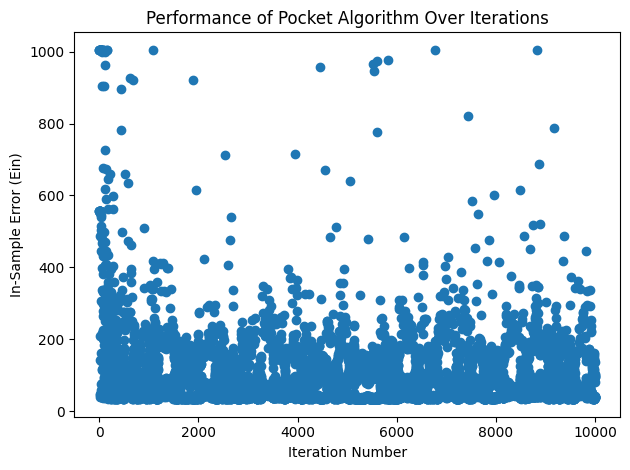

Lowest In-Sample Error (Ein_best): 33.0
Optimal Weights (w_best):
[[-8.99      ]
 [-1.18516016]
 [11.82590594]]


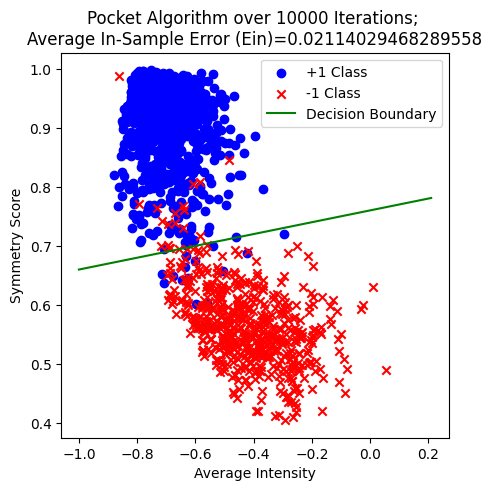

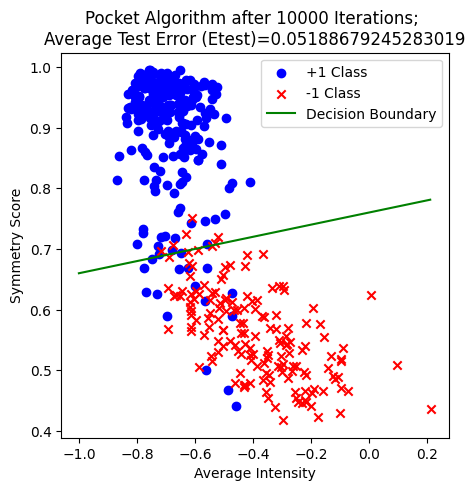

In [ ]:
# Assuming all necessary functions and imports have been defined previously

iterations = 10000
optimalWeights = pocketAlgorithm(featuresTrain, labelsTrain, iterationsLimit=iterations)
inSampleError = np.round(totalError(optimalWeights, featuresTrain, labelsTrain), 5)
averageInSampleError = inSampleError.mean()
visualizeLinearBoundary(optimalWeights, featuresTrain, labelsTrain, plotTitle=f'Pocket Algorithm over {iterations} Iterations; \nAverage In-Sample Error (Ein)={averageInSampleError}')

testError = np.round(totalError(optimalWeights, featuresTest, labelsTest), 5)
averageTestError = testError.mean()
visualizeLinearBoundary(optimalWeights, featuresTest, labelsTest, plotTitle=f'Pocket Algorithm after {iterations} Iterations; \nAverage Test Error (Etest)={averageTestError}')

In [ ]:
def calculateLinearWeights(featureMatrix, targetValues):

    sampleSize, featureCount = featureMatrix.shape
    transposedFeatures = featureMatrix.T
    # Calculating weights using the normal equation
    optimalWeights = np.linalg.inv(transposedFeatures @ featureMatrix) @ transposedFeatures @ targetValues

    return optimalWeights

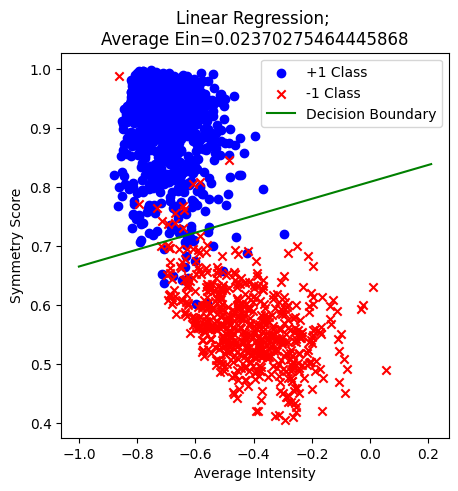

Estimated Eout based on Ein:
0.05807681082095556


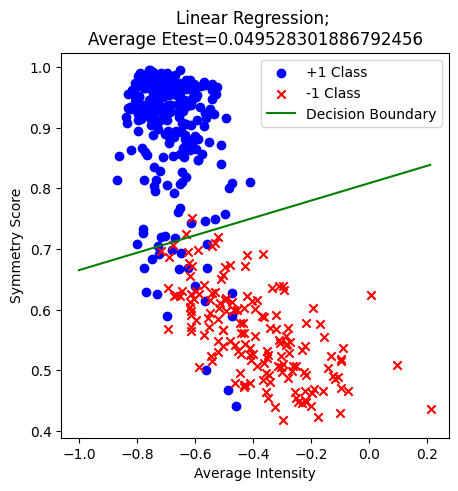

Estimated Eout based on Etest:
0.11548354198103422


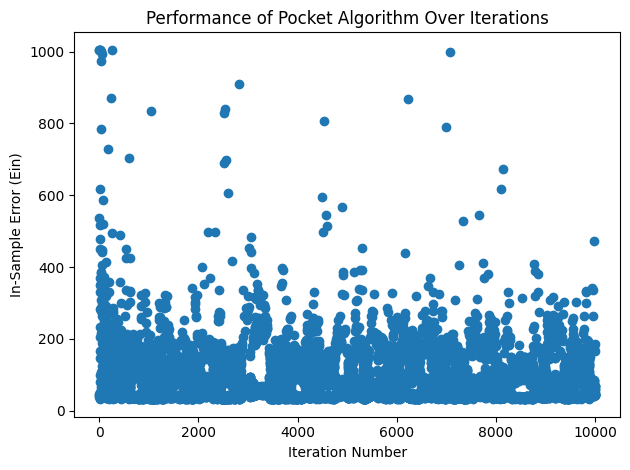

Lowest In-Sample Error (Ein_best): 32.0
Optimal Weights (w_best):
[[-12.57805185]
 [ -1.29404253]
 [ 16.78582118]]


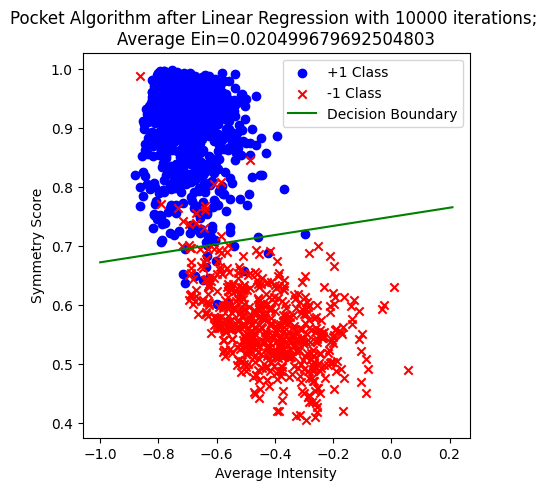

Estimated Eout based on Ein after Pocket:
0.05487373586900168


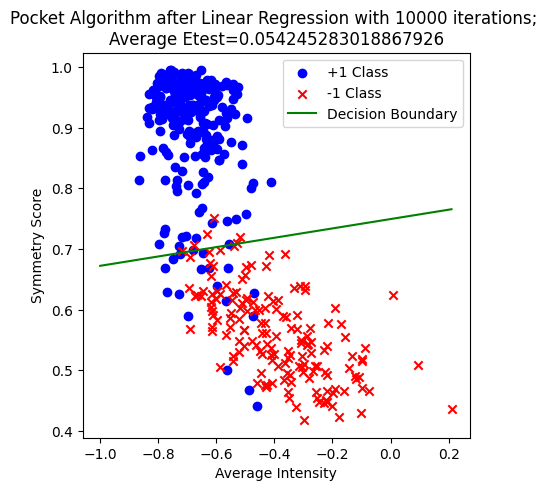

Estimated Eout based on Etest after Pocket:
0.12020052311310969


In [ ]:
def computeHoeffdingBound(inSampleError, sampleSize, confidenceInterval):
    # Compute the Hoeffding bound for the true error based on in-sample error
    epsilon = np.sqrt((1 / (2 * sampleSize)) * np.log(2 / confidenceInterval))
    trueErrorBound = inSampleError + epsilon
    return trueErrorBound

totalSamplesTrain = featuresTrain.shape[0]
confidenceLevel = 0.05
weightsLinear = calculateLinearWeights(featuresTrain, labelsTrain)

inSampleErrorLinear = np.round(totalError(weightsLinear, featuresTrain, labelsTrain), 5)
averageInSampleErrorLinear = inSampleErrorLinear.mean()
visualizeLinearBoundary(weightsLinear, featuresTrain, labelsTrain, plotTitle=f'Linear Regression; \nAverage Ein={averageInSampleErrorLinear}')
outOfSampleErrorBoundEin = computeHoeffdingBound(averageInSampleErrorLinear, totalSamplesTrain, confidenceLevel)
print("Estimated Eout based on Ein:")
print(outOfSampleErrorBoundEin)

totalSamplesTest = featuresTest.shape[0]
testErrorLinear = np.round(totalError(weightsLinear, featuresTest, labelsTest), 5)
averageTestErrorLinear = testErrorLinear.mean()
visualizeLinearBoundary(weightsLinear, featuresTest, labelsTest, plotTitle=f'Linear Regression; \nAverage Etest={averageTestErrorLinear}')
outOfSampleErrorBoundEtest = computeHoeffdingBound(averageTestErrorLinear, totalSamplesTest, confidenceLevel)
print("Estimated Eout based on Etest:")
print(outOfSampleErrorBoundEtest)

iterationsLimit = 10000
weightsPocket = pocketAlgorithm(featuresTrain, labelsTrain, initialWeights=weightsLinear, iterationsLimit=iterationsLimit)

inSampleErrorPocket = np.round(totalError(weightsPocket, featuresTrain, labelsTrain), 5)
averageInSampleErrorPocket = inSampleErrorPocket.mean()
visualizeLinearBoundary(weightsPocket, featuresTrain, labelsTrain, plotTitle=f'Pocket Algorithm after Linear Regression with {iterationsLimit} iterations; \nAverage Ein={averageInSampleErrorPocket}')
estimatedEoutEin = computeHoeffdingBound(averageInSampleErrorPocket, totalSamplesTrain, confidenceLevel)
print("Estimated Eout based on Ein after Pocket:")
print(estimatedEoutEin)

testErrorPocket = np.round(totalError(weightsPocket, featuresTest, labelsTest), 5)
averageTestErrorPocket = testErrorPocket.mean()
visualizeLinearBoundary(weightsPocket, featuresTest, labelsTest, plotTitle=f'Pocket Algorithm after Linear Regression with {iterationsLimit} iterations; \nAverage Etest={averageTestErrorPocket}')
estimatedEoutEtest = computeHoeffdingBound(averageTestErrorPocket, totalSamplesTest, confidenceLevel)
print("Estimated Eout based on Etest after Pocket:")
print(estimatedEoutEtest)